In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [32]:
import os
os.chdir("C:/Users/chenh/Desktop/y2s3/UCCC2513 Mini Project/Week 7")

# Question 1

In [34]:
img = cv.imread('dog1.jfif',0)
equ = cv.equalizeHist(img)
equtwice= cv.equalizeHist(equ)
res = np.hstack((equ, equtwice))
cv.imshow('img',res)
cv.waitKey(0)
cv.destroyAllWindows()

#no difference between 2 images

# Question 2

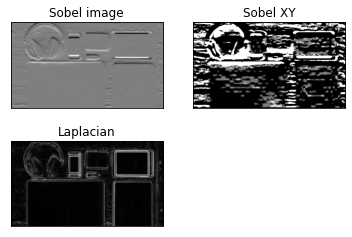

In [36]:
img = cv.imread('electronic.jfif', 0)

#without gaussian blurring
sobelx = cv.Sobel(img,cv.CV_64F,1,1,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
img_sobel = sobelx + sobely
plt.subplot(2,2,1),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel image'), plt.xticks([]), plt.yticks([])

#withgaussion blurring
img2 = cv.GaussianBlur(img,(5,5),0)
sobelX = cv.Sobel(img2,cv.CV_8U,0,1,ksize=5)
sobelY = cv.Sobel(img2,cv.CV_8U,0,1,ksize=5)
img_sobelgaussian = sobelX + sobelY
plt.subplot(2,2,2),plt.imshow(img_sobelgaussian,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])

#Laplacian of Gaussian
laplacian_blur = cv.Laplacian(img2, cv.CV_64F, ksize = 3)
laplacian_blur = np.uint8(np.absolute(laplacian_blur))
plt.subplot(2,2,3),plt.imshow(laplacian_blur,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

cv.waitKey(0)
cv.destroyAllWindows()

#kernel size 5 is the best to be used

In [37]:
# Based on question 2 results, laplacian image processing is the most optimal. Because we can clearly see the shape of the object from the images

# Question 3

In [38]:
img = cv.imread('pineapple.jfif', 0)
#Sobel
img2 = cv.GaussianBlur(img,(5,5),0)
sobelX = cv.Sobel(img2,cv.CV_8U,0,1,ksize=5)
sobelY = cv.Sobel(img2,cv.CV_8U,0,1,ksize=5)
img_sobelgaussian = sobelX + sobelY

#Laplacian
laplacian_blur = cv.Laplacian(img2, cv.CV_64F, ksize = 3)
laplacian_blur = np.uint8(np.absolute(laplacian_blur))


#Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img2, -1, kernelx)
img_prewitty = cv.filter2D(img2, -1, kernely)

#Scharr derivatives
scharr_X = cv.Scharr(img, cv.CV_32F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X)) 
scharr_Y = cv.Scharr(img, cv.CV_32F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 
scharr_XY_combined = cv.bitwise_or(scharr_Y_abs,scharr_X_abs) 
#Canny operators
img_canny = cv.Canny(img, 100, 200)


#Display
cv.imshow('Sobel XY',img_sobelgaussian)
cv.imshow('Laplacian',laplacian_blur)
cv.imshow("Prewitt X",img_prewittx)
cv.imshow("Prewitt Y",img_prewitty)
cv.imshow("scharr_XY_combined",img_prewittx + img_prewitty)
cv.imshow("img_canny",img_canny)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 4

In [45]:
img = cv.imread('electronic.jfif', 0)

ret,thresh = cv.threshold(img,200,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
for item in range(len(contours)):
    cnt = contours[item]
    if len(cnt)>20:
        print(len(cnt))
        M = cv.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        x,y,w,h = cv.boundingRect(cnt)
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv.imshow('image',img)
        cv.waitKey(0)
        cv.destroyAllWindows()

83
32
